<a href="https://colab.research.google.com/github/romenlaw/NaiveNeuralNetwork/blob/main/makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git config --global user.name "romenlaw"
!git config --global user.email "e"
!git clone https://github.com/romenlaw/NaiveNeuralNetwork

Cloning into 'NaiveNeuralNetwork'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 202 (delta 27), reused 13 (delta 6), pack-reused 144 (from 1)
Receiving objects: 100% (202/202), 2.45 MiB | 10.06 MiB/s, done.
Resolving deltas: 100% (93/93), done.


In [5]:
%cd NaiveNeuralNetwork

/content/NaiveNeuralNetwork


#  MakeMore playgound #

In [4]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
min(len(w) for w in words)

2

In [ ]:
max(len(w) for w in words)

15

# Bigrams ##
Bigram language model - always look at 2 characters at a time: to look at 1st character to predict the next character.

In [ ]:
bigram_counts = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for c1, c2 in zip(chs, chs[1:]):
    bigram = (c1, c2)
    bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1


In [ ]:
sorted(bigram_counts.items(), key = lambda kv: kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

## Vocab with two special tokens
Now, let's do the above in a 2-dim array, where the rows are the 1st letter, the columns are the 2nd letter.
There are 26 letters and two special tokens - total of 28 elements.

We will use 'a' as the 0th element, ... and START and END tokens to be the 26th and 27th elements, respectively.

In [10]:
vocab = sorted(list(set(''.join(words))))
vocab.append('<S>')
vocab.append('<E>')

stoi = {s:i for i,s in enumerate(vocab)}

stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [11]:
itos = {i:s for s,i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

In [6]:
import torch

In [12]:
N = torch.zeros((len(vocab), len(vocab)), dtype=torch.int32) # the array stores counts, so use int
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for c1, c2 in zip(chs, chs[1:]):
    ix1 = stoi[c1]
    ix2 = stoi[c2]
    N[ix1, ix2] += 1

In [13]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

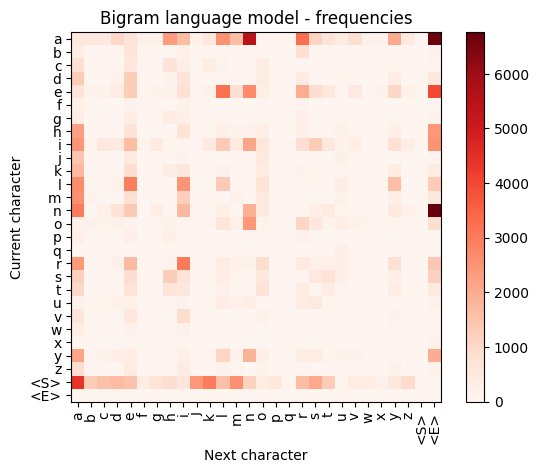

In [31]:
plt.imshow(N, cmap='Reds', interpolation='nearest')
plt.colorbar()
plt.xticks(torch.arange(len(vocab)), vocab, rotation=90)
plt.yticks(torch.arange(len(vocab)), vocab)
plt.xlabel('Next character')
plt.ylabel('Current character')
plt.title('Bigram language model - frequencies')
plt.show()

Making the above heatmap more readable.

(-0.5, 27.5, 27.5, -0.5)

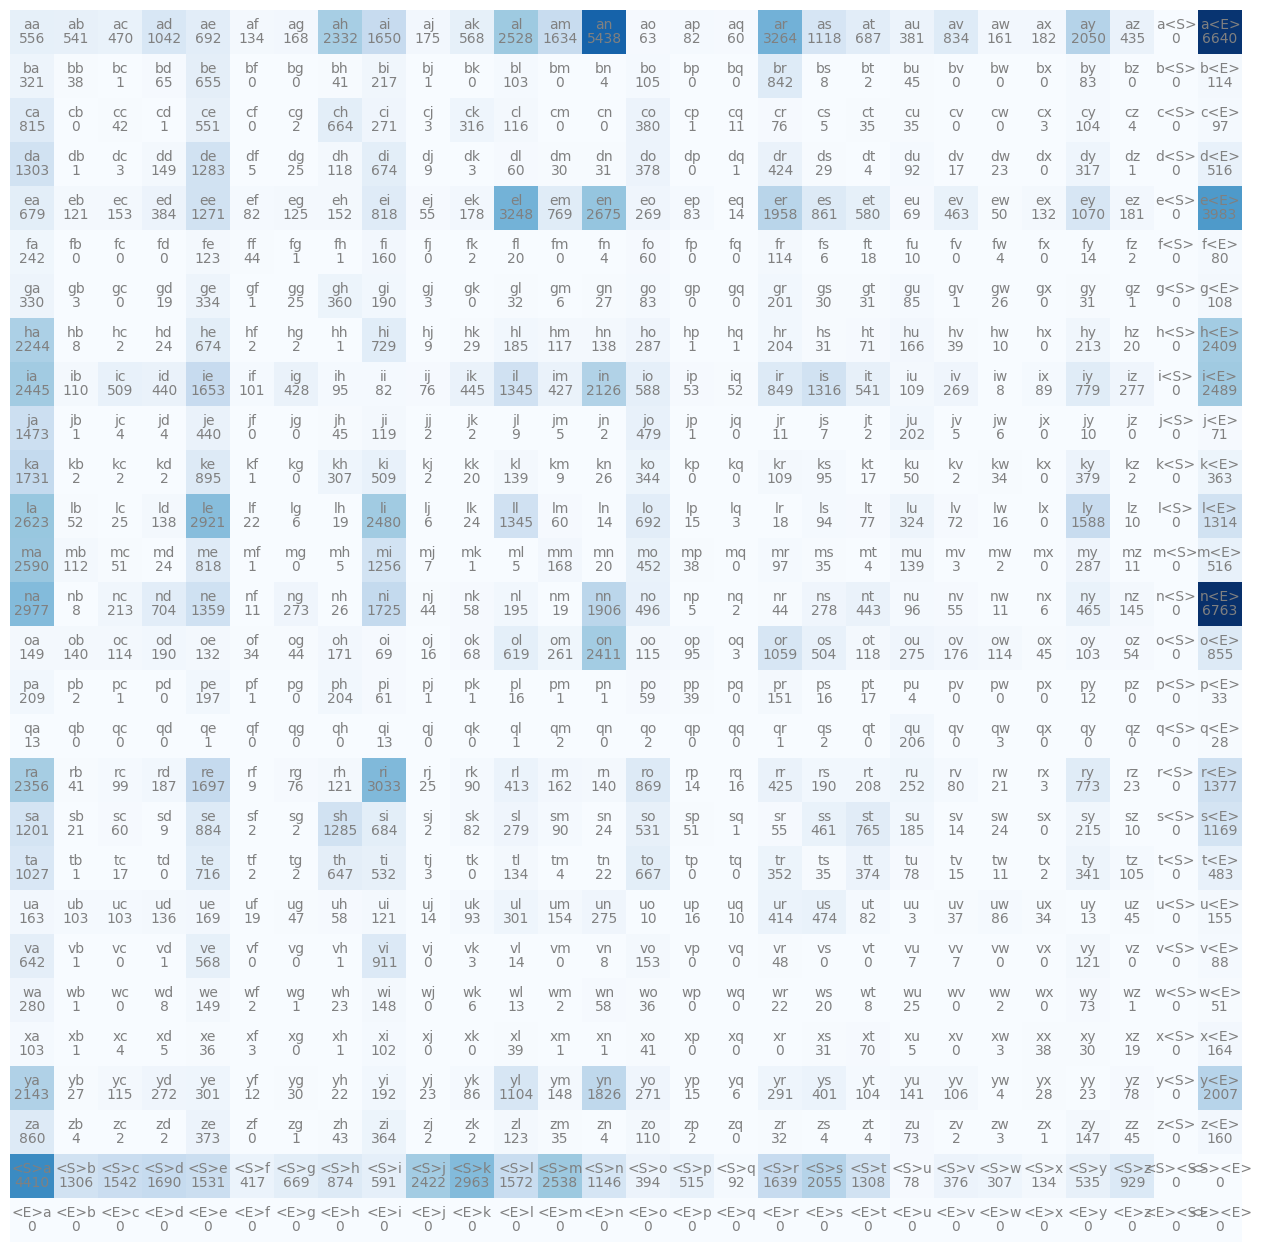

In [33]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(len(vocab)):
  for j in range(len(vocab)):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

## Vocab with 1 special token
The above plot reveals the wastage of having entire row and column of zeros. Also there is not occurance of START+END (empty string). So it's unnecessary to have both START and END tokens. Instead, we can have just one special token '.' and make it the first (0th) element of the vocab.

In [13]:
vocab = sorted(list(set(''.join(words))))
vocab.insert(0, '.')

stoi = {s:i for i,s in enumerate(vocab)}
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [14]:
itos = {i:s for s,i in stoi.items()}
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [15]:
N = torch.zeros((len(vocab), len(vocab)), dtype=torch.int32) # the array stores counts, so use int
for w in words:
  chs = ['.'] + list(w) + ['.']
  for c1, c2 in zip(chs, chs[1:]):
    ix1 = stoi[c1]
    ix2 = stoi[c2]
    N[ix1, ix2] += 1

In [53]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

(-0.5, 26.5, 26.5, -0.5)

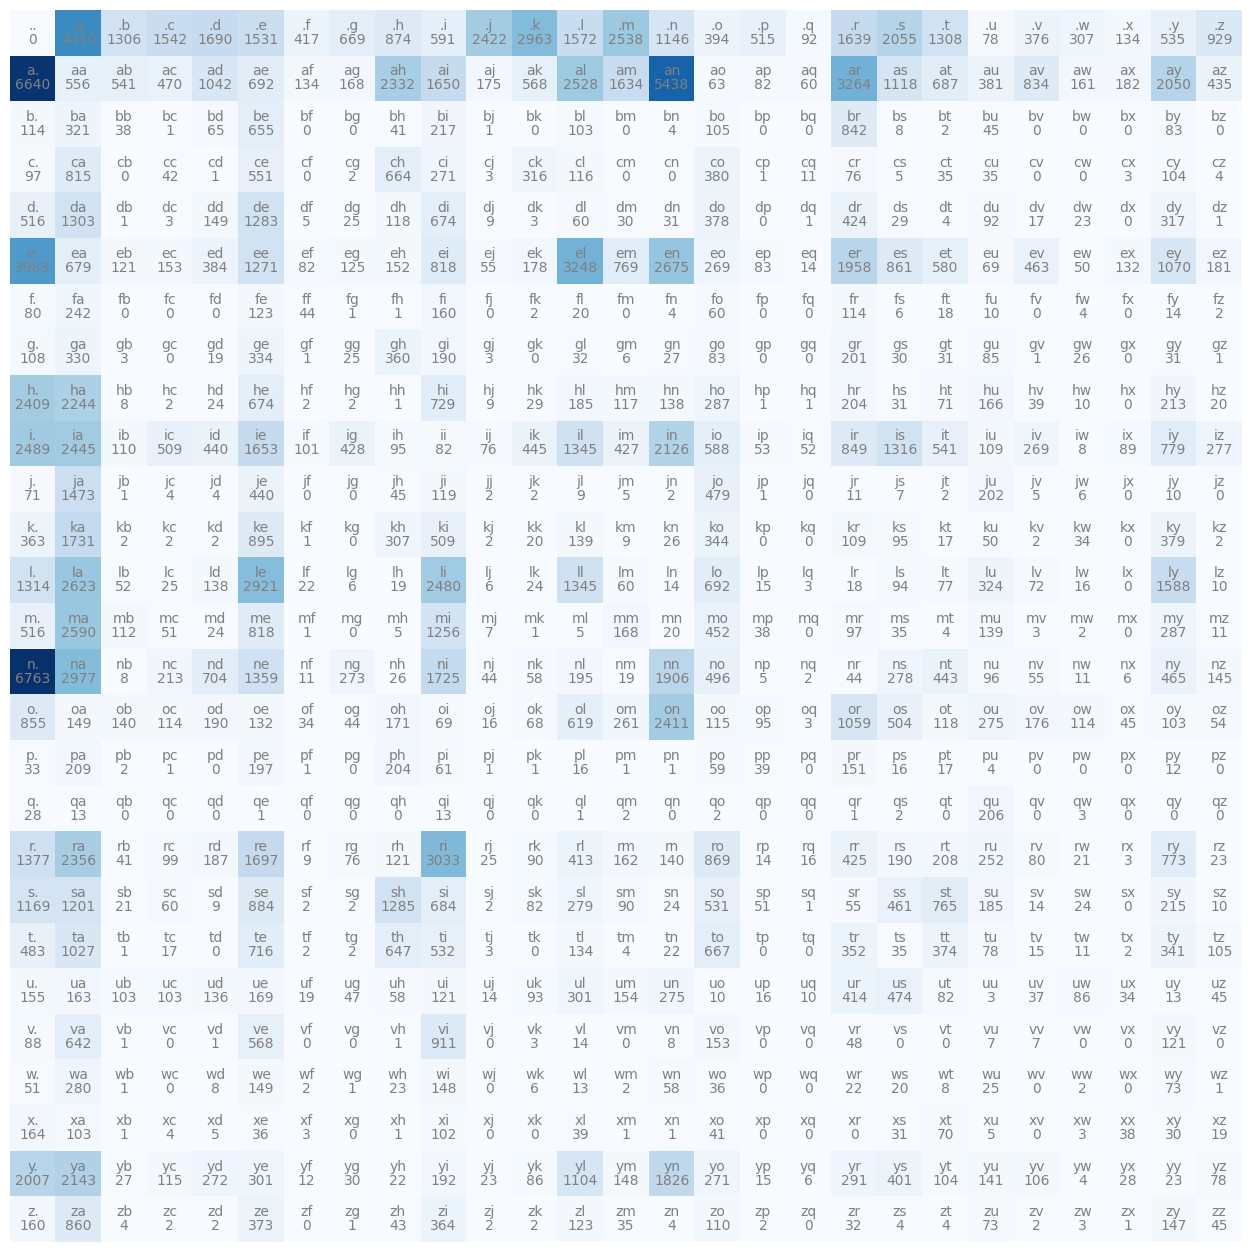

In [54]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(len(vocab)):
  for j in range(len(vocab)):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

## Probabilities

In [16]:
g = torch.Generator().manual_seed(20240818)
p = torch.rand(3, generator=g)
p = p/p.sum()
p

tensor([0.1800, 0.1282, 0.6918])

In [64]:
torch.multinomial(p, 27, replacement=True, generator=g )

tensor([2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 2,
        2, 0, 2])

Prepare a probabilities matrix of N.
Use N+1 as **model smoothing** to avoid zero probabilities which can result in infinite loss value even if only 1 bigram out of the whole word has a zero prob. The higher the value added, the smoother the model becomes - i.e. the prob (likelihood) of each bigram become closer, resulting longer words.

In [17]:
P = (N+1).float()
P /= P.sum(1, keepdim=True) # /= is in-place operation as opposed to P=P/P.sum...

The heatmap of P should be identical to N

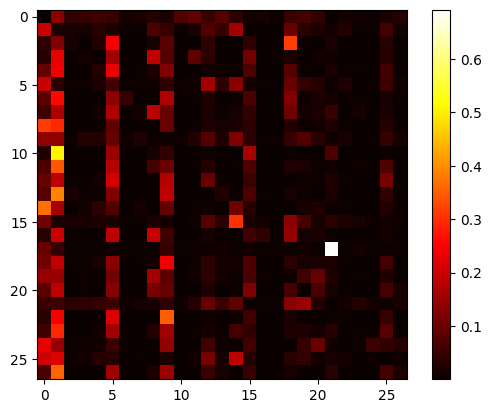

In [338]:
plt.imshow(P, cmap='hot')
plt.colorbar()

(-0.5, 26.5, 26.5, -0.5)

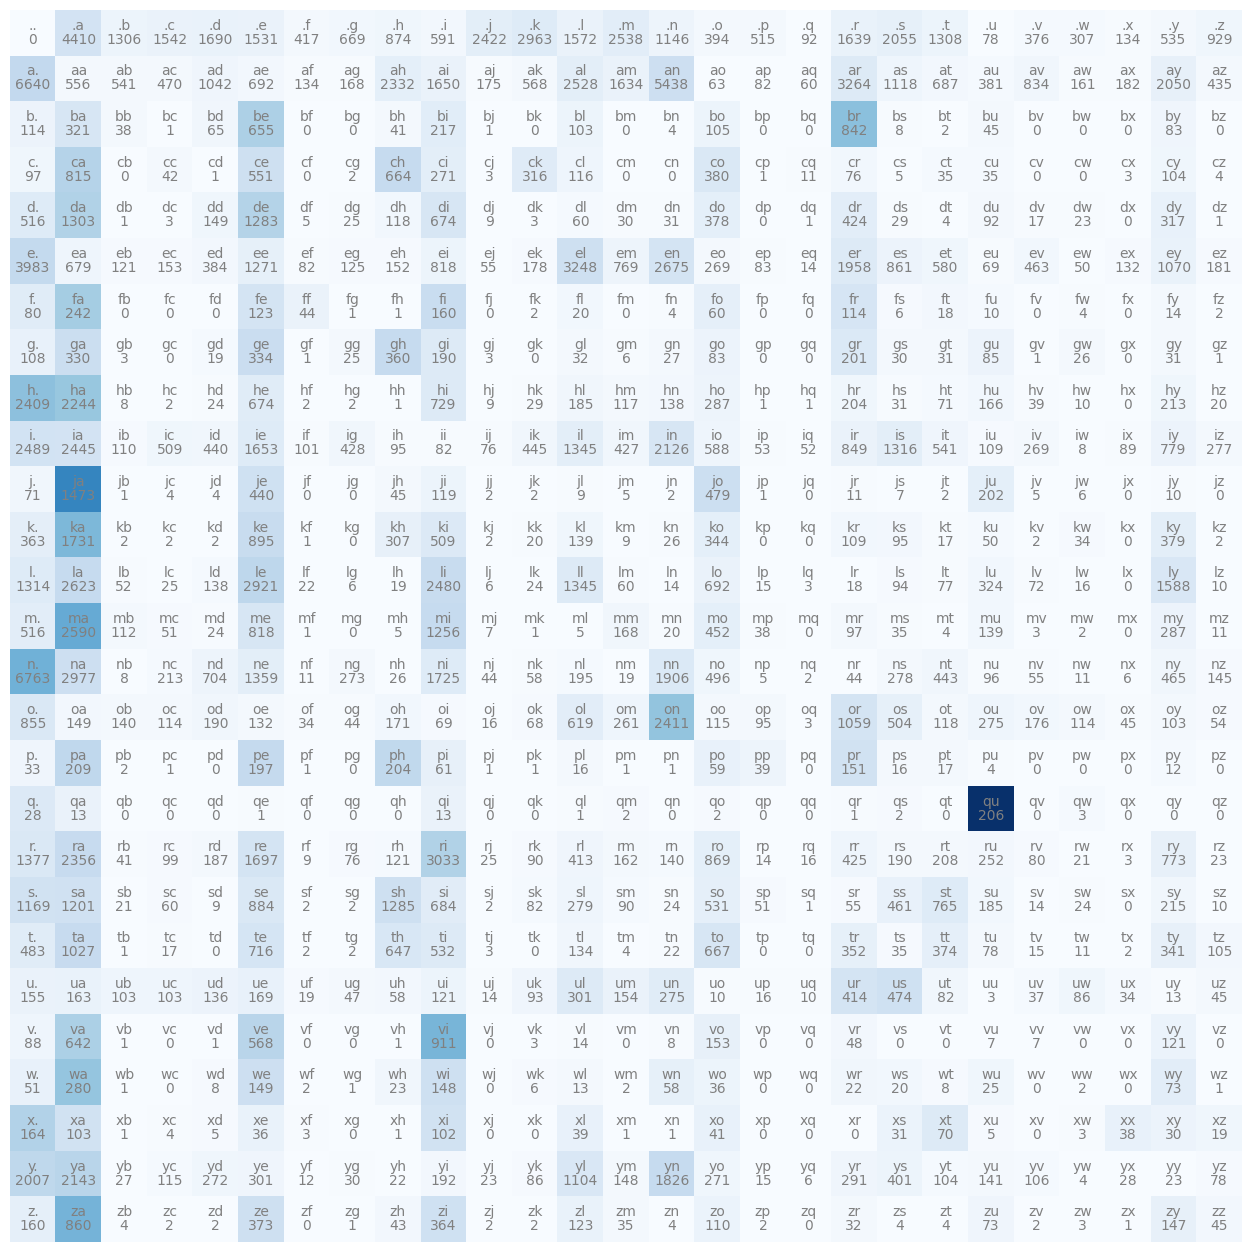

In [77]:
plt.figure(figsize=(16,16))
plt.imshow(P, cmap='Blues')
for i in range(len(vocab)):
  for j in range(len(vocab)):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

In [120]:
g = torch.Generator().manual_seed(20240818)

for i in range(5):
  out =  []
  ix = 0
  while True:
    p = P[ix]

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append( itos[ix])
    if ix == 0: # reached special token, then stop
      break

  print(''.join(out))

berazisellinimi.
ja.
baroniash.
elexfrrema.
diqus.


## Maximum Likelihood Estimation
Measure the quality of the estimation with a single number - i.e. the porduct of the probs should be large. Instead of using the product directly, we use log to avoid multiplying small numbers (and resulting in very small numbers).

![MLE](https://wikimedia.org/api/rest_v1/media/math/render/svg/167c37f9f65131bd48894e79b527b0f9a030f1c6)

Calculatiing the loss of the training data set is about 2.45.

In [229]:
log_likelihood=0.0
n=0
for w in words:
#for w in ["lawq"]: # produces loss inf since prob of wq is 0. Fix it by model smoothing.
  chs = ['.'] + list(w) + ['.']
  for c1, c2 in zip(chs, chs[1:]):
    ix1 = stoi[c1]
    ix2 = stoi[c2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{c1}{c2} {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
# negative log likelihood is >=0, and used for a loss function
nll = -log_likelihood
print(f'{nll=}')
print(f'loss = {nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
loss = 2.4543561935424805


## Prepare Dataset ##

In [18]:
#create the training dataset of bigrams (x, y)
# basically x and y are shifted by one position.
xs, ys = [], []
for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for c1, c2 in zip(chs, chs[1:]):
    ix1 = stoi[c1]
    ix2 = stoi[c2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs) # using torch.tensor instead of torch.Tensor because
ys = torch.tensor(ys) # torch.tensor auto determine data type (integer in this case)

In [152]:
xs

tensor([ 0,  5, 13, 13,  1])

In [153]:
ys

tensor([ 5, 13, 13,  1,  0])

In [154]:
xs.dtype

torch.int64

In [146]:
import torch.nn.functional as F

In [155]:
# for neuro net we want to use float instead of int
xenc = F.one_hot(xs, num_classes=len(vocab)).float()

In [156]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [157]:
xenc.shape

torch.Size([5, 27])

In [159]:
xenc.dtype

torch.float32

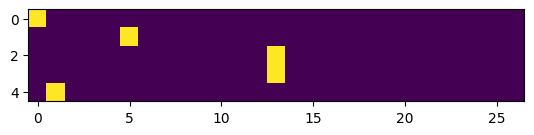

In [158]:
plt.imshow(xenc)

## Single Linear Layer NN ##
Here we create a single layer NN with no non-linearity:
inputs -> linear layer -> output

Initialise the weights W with normally distributed random floats.

<img alt='normal distribution' src='https://www.scribbr.de/wp-content/uploads/2023/01/standard-normal-distribution-example.webp' width=500/>

In [190]:
g = torch.Generator().manual_seed(20240818)
W = torch.randn((len(vocab), len(vocab)))

In [164]:
W

tensor([[-6.3751e-01, -1.3450e+00,  3.4404e-02, -1.5059e+00, -1.2369e+00,
          7.2083e-01,  8.8853e-01,  5.0234e-01, -1.6438e-01,  2.1395e-01,
         -4.6602e-01, -8.7908e-02, -2.2517e+00,  1.0975e+00, -1.7923e+00,
         -5.7261e-01, -8.6014e-01,  9.8131e-01,  3.3490e-01,  1.1432e+00,
          9.9814e-01, -5.8366e-01, -4.5734e-01, -1.4550e-01, -9.3338e-01,
          5.3288e-01,  1.4195e+00],
        [ 8.5052e-02, -4.3851e-01,  1.6471e+00,  7.3959e-01, -1.1431e+00,
         -4.5519e-02,  1.1452e+00, -4.4044e-01, -6.8687e-01,  4.6822e-01,
          2.2276e+00,  3.0447e-01,  2.0476e+00,  5.7062e-01,  2.0331e+00,
         -9.1803e-01,  2.2442e-01,  2.4362e-01,  1.7936e-01, -8.6013e-02,
         -3.8411e-01,  8.7781e-01, -1.4498e-01, -5.5600e-01,  8.3817e-01,
         -3.5754e-01,  5.6171e-01],
        [-1.5890e+00,  2.9717e-01, -1.3530e-01, -2.6947e-01, -5.6421e-01,
          5.3458e-01,  8.8284e-01, -1.2330e-01, -2.1478e+00, -4.1383e-01,
          1.9799e+00, -1.3882e+00, -1.68

In [165]:
xenc @ W # (5, 27) @ (27, 27) = (5, 27)

tensor([[-0.6375, -1.3450,  0.0344, -1.5059, -1.2369,  0.7208,  0.8885,  0.5023,
         -0.1644,  0.2140, -0.4660, -0.0879, -2.2517,  1.0975, -1.7923, -0.5726,
         -0.8601,  0.9813,  0.3349,  1.1432,  0.9981, -0.5837, -0.4573, -0.1455,
         -0.9334,  0.5329,  1.4195],
        [ 0.0971, -1.6909,  2.3787, -2.6705, -0.5940, -0.4646, -0.3129, -0.5562,
          0.4297,  0.0849, -0.7794, -0.5927, -0.5145, -0.7955,  0.4516,  0.5556,
         -0.6394, -0.3185,  0.1778,  1.0220,  1.1541, -0.7609,  1.7293, -1.3978,
          0.8023,  0.4971,  0.2799],
        [ 1.0995, -2.1383,  2.8591, -0.6312,  1.1557, -0.6652,  1.9589, -0.2182,
         -0.4286, -1.7573, -0.9063,  0.2349, -0.1590, -1.9156, -0.9375, -1.4124,
          1.5950, -0.4789,  0.3630, -0.5398,  0.1939, -0.3684,  0.4778, -0.7695,
          0.4872,  0.7416,  0.2569],
        [ 1.0995, -2.1383,  2.8591, -0.6312,  1.1557, -0.6652,  1.9589, -0.2182,
         -0.4286, -1.7573, -0.9063,  0.2349, -0.1590, -1.9156, -0.9375, -1.4124

In [166]:
(xenc @ W)[2, 21]

tensor(-0.3684)

In [167]:
xenc[2]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [173]:
W[:,21]

tensor([-0.5837,  0.8778,  0.7987, -0.4002, -0.0136, -0.7609, -2.3870, -1.5007,
         0.0803, -0.3988, -0.1128, -0.6724,  0.4134, -0.3684, -3.1493,  0.6582,
        -0.7707, -1.0202,  1.7308,  0.5839,  0.8134, -2.2630,  0.4651, -0.0188,
        -0.9794,  0.3973, -0.2220])

In [178]:
xenc[2] @ W[:, 21]

tensor(-0.3684)

In [176]:
(xenc[2] * W[:, 21]).sum()

tensor(-0.3684)

In [191]:
logits = xenc @ W # predict log-counts
# softmax
counts = logits.exp()  # equivalent to the N
probs = counts / counts.sum(1, keepdims=True) # equivalent to the P
probs

tensor([[0.0279, 0.0279, 0.0564, 0.0201, 0.0688, 0.0096, 0.0439, 0.0178, 0.0145,
         0.1609, 0.0575, 0.2301, 0.0267, 0.0036, 0.0048, 0.0059, 0.0063, 0.0258,
         0.0479, 0.0138, 0.0045, 0.0530, 0.0159, 0.0071, 0.0227, 0.0091, 0.0176],
        [0.0046, 0.0500, 0.0680, 0.0202, 0.0612, 0.0411, 0.0401, 0.0221, 0.0190,
         0.0260, 0.0484, 0.0067, 0.1256, 0.0360, 0.0041, 0.0081, 0.0064, 0.0006,
         0.0238, 0.0369, 0.0114, 0.0033, 0.0304, 0.1779, 0.0379, 0.0368, 0.0533],
        [0.0310, 0.0591, 0.2051, 0.0282, 0.0162, 0.0399, 0.0466, 0.0345, 0.0023,
         0.0179, 0.0073, 0.0060, 0.0222, 0.0146, 0.0272, 0.0456, 0.0234, 0.0036,
         0.1429, 0.0319, 0.0102, 0.0416, 0.0063, 0.0368, 0.0085, 0.0309, 0.0602],
        [0.0310, 0.0591, 0.2051, 0.0282, 0.0162, 0.0399, 0.0466, 0.0345, 0.0023,
         0.0179, 0.0073, 0.0060, 0.0222, 0.0146, 0.0272, 0.0456, 0.0234, 0.0036,
         0.1429, 0.0319, 0.0102, 0.0416, 0.0063, 0.0368, 0.0085, 0.0309, 0.0602],
        [0.0338, 0.0109,

In [180]:
probs.shape

torch.Size([5, 27])

In [182]:
probs[3].sum()

tensor(1.)

In [205]:
# experiment on the first word '.emma'
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label ground truth: ', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0091, 0.0221, 0.0192, 0.0434, 0.0413, 0.0354, 0.1296, 0.0925, 0.0065,
        0.0166, 0.0013, 0.0083, 0.0645, 0.0150, 0.1458, 0.0027, 0.0199, 0.0586,
        0.0173, 0.0048, 0.0140, 0.0125, 0.0065, 0.0195, 0.0019, 0.0211, 0.1706],
       grad_fn=<SelectBackward0>)
label ground truth:  5
probability assigned by the net to the the correct character: 0.03542729467153549
log likelihood: -3.3402726650238037
negative log likelihood: 3.3402726650238037
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0212, 0.0776, 0.0366, 0.0093, 0.0519, 0.0199, 0.0700, 0.0306, 0.0038,
        0.0520, 0.0412, 0.0520, 0.0751, 0.0769, 0.0079, 0.0078, 0.0602, 0.0060,
        0.0118, 0.0701, 0.0368, 0.0209, 0.0078, 0.0076, 0.1223, 0.0132, 0.0095],
       grad_fn=<SelectBackward0>)
label ground truth:  13
probability as

## optimisation ##

In [194]:
xs

tensor([ 0,  5, 13, 13,  1])

In [195]:
ys

tensor([ 5, 13, 13,  1,  0])

In [196]:
g = torch.Generator().manual_seed(20240818)
W = torch.randn((len(vocab), len(vocab)), generator=g, requires_grad=True)

In [210]:
# forward pass
xenc = F.one_hot(xs, num_classes=len(vocab)).float()
logits = xenc @ W # predict log-counts
## softmax
counts = logits.exp()  # equivalent to the N
probs = counts / counts.sum(1, keepdims=True) # equivalent to the P

In [202]:
probs.shape

torch.Size([5, 27])

In [198]:
# we want the probs of ys, i.e.
probs[0, ys[0]], probs[1][ys[1]], probs[2][ys[2]], probs[3][ys[3]], probs[4][ys[4]]

(tensor(0.0354, grad_fn=<SelectBackward0>),
 tensor(0.0769, grad_fn=<SelectBackward0>),
 tensor(0.0025, grad_fn=<SelectBackward0>),
 tensor(0.2743, grad_fn=<SelectBackward0>),
 tensor(0.0105, grad_fn=<SelectBackward0>))

In [200]:
probs[torch.arange(5), ys]

tensor([0.0354, 0.0769, 0.0025, 0.2743, 0.0105], grad_fn=<IndexBackward0>)

In [211]:
loss = -probs[torch.arange(5), ys].log().mean()

In [212]:
loss # same value as the experiment runs above

tensor(3.5300, grad_fn=<NegBackward0>)

In [206]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [208]:
W.shape, W.grad.shape

(torch.Size([27, 27]), torch.Size([27, 27]))

In [207]:
W.grad

tensor([[ 0.0018,  0.0044,  0.0038,  0.0087,  0.0083, -0.1929,  0.0259,  0.0185,
          0.0013,  0.0033,  0.0003,  0.0017,  0.0129,  0.0030,  0.0292,  0.0005,
          0.0040,  0.0117,  0.0035,  0.0010,  0.0028,  0.0025,  0.0013,  0.0039,
          0.0004,  0.0042,  0.0341],
        [-0.1979,  0.0168,  0.0076,  0.0039,  0.0013,  0.0066,  0.0028,  0.0016,
          0.0081,  0.0015,  0.0085,  0.0034,  0.0041,  0.0085,  0.0053,  0.0014,
          0.0076,  0.0447,  0.0034,  0.0025,  0.0030,  0.0163,  0.0045,  0.0283,
          0.0016,  0.0007,  0.0039],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [209]:
W.data += -0.1 * W.grad

Now if we go back to the forward pass and run it, the loss should reduce.

In [19]:
# rearranging the above cells to put things together

# create dataset
xs, ys = [], []
for w in words:
  chs = ['.']+list(w) + ['.']
  for c1, c2 in zip(chs, chs[1:]):
    ix1 = stoi[c1]
    ix2 = stoi[c2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement() # shape[0]
print('number of bigram examples: ', num)

g= torch.Generator().manual_seed(20240818)
W = torch.randn((len(vocab), len(vocab)), generator=g, requires_grad=True)

number of bigram examples:  228146


we want to get loss=2.4543561935424805 same value as using the N and P matrices. Here the W.exp() is essentially the same as P.

Regularisation has the model smoothing effect by pushing W towards zero, hence, making probs more uniform. Increasing the reg strength is the same as increasing the model smoothing number. With regularisation it seems to converge at loss of 2.4804036617279053, without it converges to about 2.4540927410125732

In [251]:
(W**2).sum(), (W**2).mean()

(tensor(1246.6665, grad_fn=<SumBackward0>),
 tensor(1.7101, grad_fn=<MeanBackward0>))

In [21]:
# gradient descent

for k in range(1000):
  # forward pass
  xenc = F.one_hot(xs, num_classes=len(vocab)).float()
  logits = xenc @ W # predict log-counts
  ## softmax
  counts = logits.exp()  # equivalent to the N
  probs = counts / counts.sum(1, keepdims=True) # equivalent to the P
  loss = -probs[torch.arange(num), ys].log().mean() #+ 0.01*(W**2).mean()
  if k % 50 == 0:
    print(k, loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -0.5 * W.grad

0 2.4540927410125732
50 2.4540927410125732
100 2.4540927410125732
150 2.4540927410125732
200 2.4540927410125732
250 2.4540927410125732
300 2.4540927410125732
350 2.4540927410125732
400 2.4540927410125732
450 2.4540927410125732
500 2.4540927410125732
550 2.4540927410125732
600 2.4540927410125732
650 2.4540927410125732
700 2.4540927410125732
750 2.4540927410125732
800 2.4540927410125732
850 2.4540927410125732
900 2.4540927410125732
950 2.4540927410125732


In [361]:
torch.save(W, 'Bigram_W.pt')

## Sampling ##
using the NN, we get the same output as the N and P matrices.

The results using N and P are:
* berazisellinimi.
* ja.
* baroniash.
* elexfrrema.
* diqus.

In [20]:
# load the trained parameters
W = torch.load('Bigram_W.pt')

In [333]:
g = torch.Generator().manual_seed(20240818)

for i in range(5):
  out =  []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=len(vocab)).float()
    logits = xenc @ W # predict log-counts
    ## softmax
    counts = logits.exp()  # equivalent to the N
    p = counts / counts.sum(1, keepdims=True) # equivalent to the P
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append( itos[ix])
    if ix == 0: # reached special token, then stop
      break

  print(''.join(out))

berazisellinimi.
ja.
baroniash.
elexfrrema.
diqus.


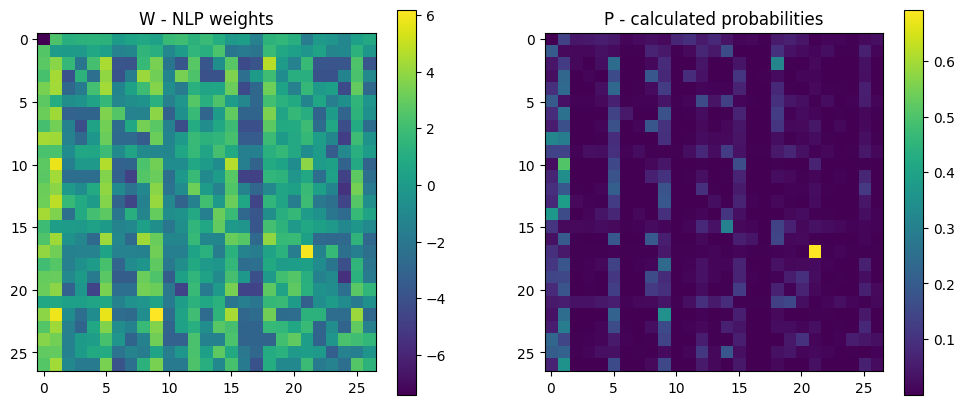

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

w_detached = W.detach().numpy()
cax1 = ax1.imshow(w_detached)
ax1.set_title('W - NLP weights')
fig.colorbar(cax1, ax=ax1)

cax2 = ax2.imshow(P)
ax2.set_title('P - calculated probabilities')
fig.colorbar(cax2, ax=ax2)


Text(0, 0.5, 'P')

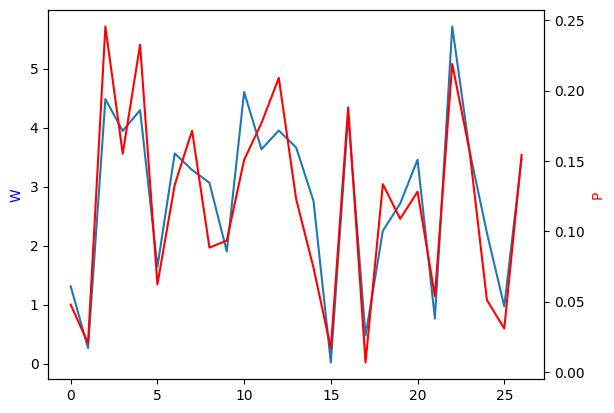

In [363]:
idx=5

fig, ax1 = plt.subplots()
ax1.plot(w_detached[:,idx])
ax1.set_ylabel('W', color='b')

ax2 = ax1.twinx()
ax2.plot(P[:,idx], color='red')
ax2.set_ylabel('P', color='r')

# NLP #
paper: [A Neural Probabilistic Language Model](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf). This model consists of:
1. embedding layer - a mapping C having no non-linearity
2. hidden layer with tanh non-linearity
3. softmax output layer


In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [6]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [26]:
vocab = sorted(list(set(''.join(words))))
vocab.insert(0, '.')
stoi = {s:i for i,s in enumerate(vocab)}
itos = {i:s for s,i in stoi.items()}

In [113]:
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
#for w in words[:5]:
for w in words:
  context = [0] * block_size # 0 is '.'
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(' '.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [114]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [371]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [372]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

## embedding
Build the embedding table C. Each token (out of 27 tokens) will have a 2-dimensional vector embedding.

In [30]:
C = torch.randn((len(vocab), 2))

In [31]:
C

tensor([[ 1.1684,  1.0826],
        [-1.5339,  0.6041],
        [ 0.7030, -0.2161],
        [ 0.1395, -0.0576],
        [-1.2800, -0.3516],
        [ 0.2235,  0.8398],
        [-0.8907,  1.2982],
        [ 1.1183, -1.7368],
        [ 0.5756, -1.5853],
        [ 1.6757,  0.9286],
        [ 0.0195,  2.5225],
        [-1.4161,  0.4633],
        [-0.4554, -0.1341],
        [ 0.4524,  0.9184],
        [ 1.3035,  0.9385],
        [ 1.3857, -0.4524],
        [ 0.8842, -0.9201],
        [-1.5591, -1.8602],
        [ 0.8186,  0.4031],
        [ 0.3916,  0.3509],
        [ 0.4240, -1.8033],
        [-0.6129, -0.2778],
        [ 0.5405, -0.4696],
        [ 0.6479, -0.6801],
        [ 1.1339, -1.4610],
        [-0.0441, -1.4417],
        [ 0.8850,  0.7703]])

The embedding layer simply retrieves the vector of a given token's index.
The following two approaches give the same result. Using index is faster than matrix multiplication, so we will use it.

In [37]:
C[26]

tensor([0.8850, 0.7703])

In [36]:
F.one_hot(torch.tensor(26), num_classes=len(vocab)).float() @ C

tensor([0.8850, 0.7703])

In [40]:
# index can be multiple:
C[torch.tensor([1,2,3,3,3])] # will retrieve rows 1,2,3 of C, can also repeat

tensor([[-1.5339,  0.6041],
        [ 0.7030, -0.2161],
        [ 0.1395, -0.0576],
        [ 0.1395, -0.0576],
        [ 0.1395, -0.0576]])

In [44]:
C[X].shape # X is (32,3), so each is embedded with 2-dim vector

torch.Size([32, 3, 2])

In [49]:
X[3,0]

tensor(5)

In [51]:
C[X][3,0] # this returns embedding of 5 (i.e. 'e')

tensor([0.2235, 0.8398])

In [53]:
itos[5]

'e'

In [54]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

## Hidden Layer
each sample in the batch has 3 tokens; each token is 2-dim vector.  So the hidden layer has input dimension of 6.

In [55]:
# number of neurons in the hidden layer
hidden_dim = 100
W1 = torch.randn(6, hidden_dim)
b1 = torch.randn(hidden_dim)

we basicallly want to calculate emb @ W1 + b1

However, the shape of emb and W1 need to match. There are a number of ways to do this.

In [57]:
# method 1 - concatenate the 3 tokens in embedding layer
emb[:, 0, :].shape # this is the embedding of the 0th token

torch.Size([32, 2])

In [60]:
# this is the shape we want, 6 matches the hidden layer's input dim
C_concat = torch.cat((emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]), dim=1)
print(C_concat.shape, C_concat)

torch.Size([32, 6]) tensor([[ 1.1684,  1.0826,  1.1684,  1.0826,  1.1684,  1.0826],
        [ 1.1684,  1.0826,  1.1684,  1.0826,  0.2235,  0.8398],
        [ 1.1684,  1.0826,  0.2235,  0.8398,  0.4524,  0.9184],
        [ 0.2235,  0.8398,  0.4524,  0.9184,  0.4524,  0.9184],
        [ 0.4524,  0.9184,  0.4524,  0.9184, -1.5339,  0.6041],
        [ 1.1684,  1.0826,  1.1684,  1.0826,  1.1684,  1.0826],
        [ 1.1684,  1.0826,  1.1684,  1.0826,  1.3857, -0.4524],
        [ 1.1684,  1.0826,  1.3857, -0.4524, -0.4554, -0.1341],
        [ 1.3857, -0.4524, -0.4554, -0.1341,  1.6757,  0.9286],
        [-0.4554, -0.1341,  1.6757,  0.9286,  0.5405, -0.4696],
        [ 1.6757,  0.9286,  0.5405, -0.4696,  1.6757,  0.9286],
        [ 0.5405, -0.4696,  1.6757,  0.9286, -1.5339,  0.6041],
        [ 1.1684,  1.0826,  1.1684,  1.0826,  1.1684,  1.0826],
        [ 1.1684,  1.0826,  1.1684,  1.0826, -1.5339,  0.6041],
        [ 1.1684,  1.0826, -1.5339,  0.6041,  0.5405, -0.4696],
        [-1.5339,  0

In [70]:
# a better way to do the above is to use unbind()
torch.cat(torch.unbind(emb, dim=1), dim=1).shape


torch.Size([32, 6])

see blogpost [PyTorch Internals](http://blog.ezyang.com/2019/05/pytorch-internals/)

In [73]:
# method 2 - reshape C
emb.view(-1, 6) == torch.cat(torch.unbind(emb, dim=1), dim=1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [71]:
emb.storage()

<ipython-input-71-e4dc75d2c03f>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  emb.storage()


 1.168400764465332
 1.0826417207717896
 1.168400764465332
 1.0826417207717896
 1.168400764465332
 1.0826417207717896
 1.168400764465332
 1.0826417207717896
 1.168400764465332
 1.0826417207717896
 0.22346147894859314
 0.839827835559845
 1.168400764465332
 1.0826417207717896
 0.22346147894859314
 0.839827835559845
 0.4524421691894531
 0.9183908700942993
 0.22346147894859314
 0.839827835559845
 0.4524421691894531
 0.9183908700942993
 0.4524421691894531
 0.9183908700942993
 0.4524421691894531
 0.9183908700942993
 0.4524421691894531
 0.9183908700942993
 -1.5339335203170776
 0.6041174530982971
 1.168400764465332
 1.0826417207717896
 1.168400764465332
 1.0826417207717896
 1.168400764465332
 1.0826417207717896
 1.168400764465332
 1.0826417207717896
 1.168400764465332
 1.0826417207717896
 1.3856667280197144
 -0.45235276222229004
 1.168400764465332
 1.0826417207717896
 1.3856667280197144
 -0.45235276222229004
 -0.4554142355918884
 -0.1340673863887787
 1.3856667280197144
 -0.45235276222229004
 -0

In [77]:
# now let's calc the hidden layer
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [79]:
h

tensor([[ 1.0000,  0.9995, -0.9749,  ..., -0.5942,  0.7149,  0.8888],
        [ 1.0000,  0.9961, -0.9532,  ..., -0.6158,  0.4863,  0.7811],
        [ 0.9957,  0.9895, -0.9728,  ..., -0.1917, -0.6303,  0.8986],
        ...,
        [ 0.9979,  0.3596,  0.8831,  ..., -0.6177,  0.3540, -0.3378],
        [ 1.0000,  0.8364,  0.9864,  ...,  0.9466,  0.2057,  0.9648],
        [ 0.9999,  0.8296,  0.9995,  ..., -0.9893,  0.8088, -0.9528]])

## softmax output layer

In [80]:
W2 = torch.randn(hidden_dim, len(vocab))
b2 = torch.randn(len(vocab))

In [81]:
logits = h @ W2 + b2

In [83]:
logits.shape

torch.Size([32, 27])

In [86]:
log_count = logits.exp()
prob = log_count / log_count.sum(dim=1, keepdims=True)

In [93]:
prob.shape

torch.Size([32, 27])

In [92]:
prob.sum(dim=1)  # sums to 1, so normalised

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [94]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [98]:
# this gives the prob of each value of Y (label, ground true) in the batch
prob[torch.arange(prob.shape[0]), Y]

tensor([7.5652e-15, 6.8773e-04, 1.5150e-03, 2.3901e-04, 6.0826e-01, 9.9245e-03,
        8.1488e-08, 1.9585e-01, 2.3418e-10, 4.9028e-01, 6.5472e-07, 1.8517e-09,
        7.5010e-06, 4.3677e-03, 2.4704e-10, 1.5250e-07, 9.8938e-01, 3.3690e-04,
        4.7039e-06, 1.9821e-10, 6.9588e-11, 2.2109e-04, 3.7153e-08, 4.3360e-08,
        8.1526e-02, 4.3355e-04, 4.2553e-03, 1.8215e-10, 3.6156e-01, 3.8698e-03,
        1.8702e-05, 5.0606e-12])

In [99]:
loss = prob[torch.arange(prob.shape[0]), Y].log().mean()
loss

tensor(-11.8770)

## putting it together

In [101]:
g = torch.Generator().manual_seed(20240820)
C = torch.randn((len(vocab), 2), generator=g)
hidden_dim=100
W1 = torch.randn((6, hidden_dim), generator=g)
b1 = torch.randn(hidden_dim, generator=g)
W2 = torch.randn((hidden_dim, len(vocab)), generator=g)
b2 = torch.randn(len(vocab))
parameters = [C, W1, b1, W2, b2]

In [107]:
sum(p.nelement() for p in parameters)

3481

In [109]:
emb = C[X] # (batch_size, 3, 2)
h = torch.tanh( emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
log_counts = logits.exp()
prob = log_counts / log_counts.sum(dim=1, keepdims=True)
loss = -prob[torch.arange(prob.shape[0]), Y].log().mean()
loss

tensor(19.8671)

In [112]:
# replace the above softmax calculation with torch impl
F.cross_entropy(logits, Y)

tensor(19.8671)

In [115]:
for p in parameters:
  p.requires_grad = True

In [140]:
mini_batch_size=32
for i in range(1000):
  # mini batch
  ix = torch.randint(0, X.shape[0], (mini_batch_size,))

  #forward pass
  emb = C[X[ix]] # notice, here we ues index ix only
  h = torch.tanh( emb.view(-1, 6) @ W1 + b1 )
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])  # notice, here we ues index ix only
  if i%100==0:
    print(loss.item())

  #backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += -0.01 * p.grad

2.6396079063415527
2.6784605979919434
2.588754415512085
2.6286346912384033
2.5051004886627197
2.525563955307007
2.689108371734619
2.7582924365997314
2.3068225383758545
2.641482353210449


In [141]:
# let's see the loss of the entire samples for comparison with above
emb = C[X]
h = torch.tanh( emb.view(-1, 6) @ W1 + b1 )
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.5591, grad_fn=<NllLossBackward0>)

In [120]:
# this generates 16 random ints ranging from 0 to X.shape[0]
torch.randint(0, X.shape[0], (16,))

tensor([133057,  99066,   7996,  37884, 158075,  15669,  93418,  45392, 191434,
         23885, 220044, 124401, 114664, 219479, 206938, 219165])